In [122]:
import json
path = '/Users/kaisar.dauletbek/Desktop/NLP/data/medium-345M.test.jsonl'
data = []
for line in open(path, 'r'):
    data.append(json.loads(line))

length = []
text = []
for i in data:
    length.append(i['length'])
    text.append(i['text'])


#print(length)
tot_length = 0
for i in length:
    tot_length+=i

print(tot_length)
#print(text)
all_text = ' '.join(text)
#preparing text

3354760


In [36]:
import numpy as np
np.mean(length)
#mean length of texts

670.952

In [37]:
from nltk.tokenize import word_tokenize

tokenized_txt = word_tokenize(all_text)
tokenized_txt
#tokenizing text

['[',
 'Table',
 'of',
 'Contents',
 ']',
 '[',
 'Next',
 'Chapter',
 ']',
 'Original',
 'and',
 'most',
 'up',
 'to',
 'date',
 'translations',
 'are',
 'posted',
 'at',
 'volaretranslations.wordpress.com',
 'Support',
 'us',
 'on',
 'Patreon',
 '!',
 'Please',
 'consider',
 'donating',
 'nothing',
 'and',
 'everything',
 '(',
 'sleuth',
 'citations',
 'and',
 'all',
 ')',
 ';',
 'and',
 'BronyTron',
 ':',
 'it',
 'helps',
 'us',
 'a',
 'lot',
 ',',
 'thank',
 'you',
 'guys',
 '.',
 'Chapter',
 '2252',
 ':',
 'Vote',
 'for',
 'Hatwin',
 'to',
 'Interview',
 'the',
 'Tailholders',
 'and',
 'Lose',
 'Chen',
 'Changsheng',
 'held',
 'Tang',
 'San',
 "'s",
 'hand',
 'and',
 'looked',
 'towards',
 'the',
 'exit',
 'three',
 'seconds',
 'behind',
 'Shu',
 'Dingsheng',
 '.',
 'Ke',
 'Young',
 'looked',
 'at',
 'him',
 'wryly',
 'and',
 'said',
 ':',
 '``',
 'I',
 'wonder',
 'whether',
 'he',
 'wo',
 "n't",
 'mind',
 'if',
 'nothing',
 'happens',
 'tonight',
 '?',
 'Tomorrow',
 'night',
 ',',

In [40]:
print(type(tokenized_txt))
count = 0
for i in tokenized_txt:
    count +=1
count
#checking number of tokens

<class 'list'>


2736443

In [43]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_txt)
fdist

FreqDist({',': 93750, 'the': 76059, '.': 75449, 'to': 53395, 'of': 52690, 'and': 48998, 'in': 34543, 'a': 34054, 'for': 22032, "'s": 19593, ...})

In [19]:
fdist.N()

2736443

In [44]:
N = 15
print(f"first {N} out of {len(tokenized_txt)} words:\n{tokenized_txt[:N]}")


first 15 out of 2736443 words:
['[', 'Table', 'of', 'Contents', ']', '[', 'Next', 'Chapter', ']', 'Original', 'and', 'most', 'up', 'to', 'date']


In [45]:
import random
random.shuffle(tokenized_txt)
print('shuffled')
#shuffling text

shuffled


In [115]:
import numpy as np

full_words_num = list(map(int, np.linspace(1, len(tokenized_txt), 200)))
full_distinct_words_num = [len(set(tokenized_txt[:wn])) for wn in words_num]
#full dataset
print(f"number of words:                    {words_num[:10]}")
print(f"corresponding number of distinct words:{distinct_words_num[:10]}")

number of words:                    [1, 428, 855, 1282, 1709, 2136, 2564, 2991, 3418, 3845]
corresponding number of distinct words:[1, 325, 595, 830, 1076, 1306, 1505, 1696, 1917, 2111]


In [116]:
words = tokenized_txt[:85011]
len(words)

85011

In [117]:
import numpy as np

words_num = list(map(int, np.linspace(1, len(words), 200)))
distinct_words_num = [len(set(words[:wn])) for wn in words_num]
#smaller dataset (=gen_text size)
print(f"number of words:                    {words_num[:10]}")
print(f"corresponding number of distinct words:{distinct_words_num[:10]}")

number of words:                    [1, 428, 855, 1282, 1709, 2136, 2564, 2991, 3418, 3845]
corresponding number of distinct words:[1, 325, 595, 830, 1076, 1306, 1505, 1696, 1917, 2111]


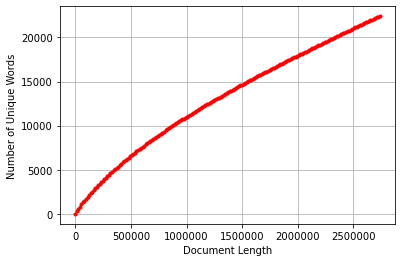

In [118]:
from matplotlib import pyplot as plt
"number of words in a function of distinct words"
plt.plot(full_words_num, full_distinct_words_num,'r.')
plt.xlabel('Document Length')
plt.ylabel('Number of Unique Words')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.grid()
#plot for full dataset

In [90]:
path = '/Users/kaisar.dauletbek/Downloads/gen_text_try'
with open(path, 'r') as BigFile:
    gen_text=BigFile.read().replace('\n', '').replace('====================', ' ')

print(type(gen_text))

print(gen_text)
#preparing generated text

<class 'str'>
Routinely visiting libraries provides visitors the chance to reconnect with a rare book author and a community around a particular topic, or a book library becomes the place to go if you are seeking out the latest knowledge on a particular topic.If you're looking for information about Sartre, Buckminster Fuller, Georges Clouzot, Madame Blavatsky, Marilyn Monroe, Jean Lafitte, Thomas Edison, Charles Foster Kane, Bertrand Russell, Alexander Graham Bell, or Karl Already a member? Please log in.Are you a new or returning member? Join Now!<|endoftext|>TODAY I will begin an open letter to the Mayor of Dublin and Taoiseach Enda Kenny, together with the DAO staff. My brief is to ask them to investigate the matter of the recent Union Order from Dublin City Hall and call on them to act on the evidence that two men were killed in Ireland and subsequently launched into a web of lies, rumours and accusations about the Tony Fernandes moved into the White Hart Lane dressing room to make

In [91]:
gen_tokenized_txt = word_tokenize(gen_text)
gen_tokenized_txt
#tokenizing generated text

['Routinely',
 'visiting',
 'libraries',
 'provides',
 'visitors',
 'the',
 'chance',
 'to',
 'reconnect',
 'with',
 'a',
 'rare',
 'book',
 'author',
 'and',
 'a',
 'community',
 'around',
 'a',
 'particular',
 'topic',
 ',',
 'or',
 'a',
 'book',
 'library',
 'becomes',
 'the',
 'place',
 'to',
 'go',
 'if',
 'you',
 'are',
 'seeking',
 'out',
 'the',
 'latest',
 'knowledge',
 'on',
 'a',
 'particular',
 'topic.If',
 'you',
 "'re",
 'looking',
 'for',
 'information',
 'about',
 'Sartre',
 ',',
 'Buckminster',
 'Fuller',
 ',',
 'Georges',
 'Clouzot',
 ',',
 'Madame',
 'Blavatsky',
 ',',
 'Marilyn',
 'Monroe',
 ',',
 'Jean',
 'Lafitte',
 ',',
 'Thomas',
 'Edison',
 ',',
 'Charles',
 'Foster',
 'Kane',
 ',',
 'Bertrand',
 'Russell',
 ',',
 'Alexander',
 'Graham',
 'Bell',
 ',',
 'or',
 'Karl',
 'Already',
 'a',
 'member',
 '?',
 'Please',
 'log',
 'in.Are',
 'you',
 'a',
 'new',
 'or',
 'returning',
 'member',
 '?',
 'Join',
 'Now',
 '!',
 '<',
 '|endoftext|',
 '>',
 'TODAY',
 'I',
 'wi

In [92]:
from nltk.probability import FreqDist
gen_fdist = FreqDist(gen_tokenized_txt)
gen_fdist

FreqDist({',': 3638, 'the': 3307, 'to': 2134, 'of': 2042, '.': 1790, 'and': 1649, 'a': 1615, 'in': 1281, "'s": 799, 'for': 782, ...})

In [93]:
gen_fdist.N()
#length of generated text

85011

In [94]:
import random
random.shuffle(gen_tokenized_txt)
print('shuffled')
#shuffling generated text

shuffled


In [120]:
gen_words = gen_tokenized_txt
len(gen_words)
#i don't know why i did it but i did it

85011

In [98]:
import numpy as np

gen_words_num = list(map(int, np.linspace(1, len(gen_words), 200)))
gen_distinct_words_num = [len(set(gen_words[:wn])) for wn in words_num]
#generated dataset
print(f"number of words:                    {gen_words_num[:10]}")
print(f"corresponding number of distinct words:{gen_distinct_words_num[:10]}")

number of words:                    [1, 428, 855, 1282, 1709, 2136, 2564, 2991, 3418, 3845]
corresponding number of distinct words:[1, 294, 526, 748, 956, 1148, 1318, 1493, 1661, 1828]


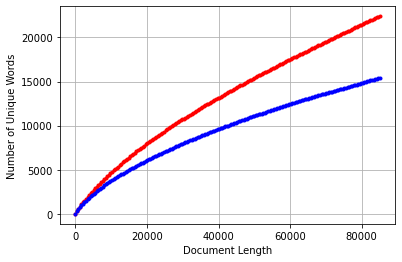

In [114]:
from matplotlib import pyplot as plt
"number of words in a function of distinct words"
plt.plot(words_num, distinct_words_num,'r.') # - test
plt.plot(gen_words_num, gen_distinct_words_num,'b.') # - generated
plt.xlabel('Document Length')
plt.ylabel('Number of Unique Words')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.grid()

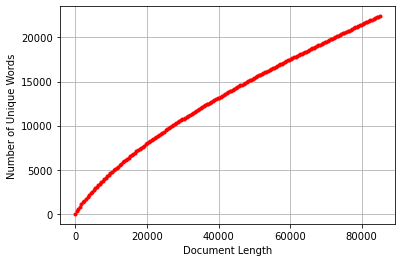

In [113]:
from matplotlib import pyplot as plt
"number of words in a function of distinct words"
plt.plot(words_num, distinct_words_num,'r.')
plt.xlabel('Document Length')
plt.ylabel('Number of Unique Words')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.grid()
#small dataset graph